In [ ]:
import keras
import matplotlib.pyplot as plt
import tensorflow as tf
import numpy as np
import pandas as pd
from keras import models
from keras.layers import Dropout

2022-08-06 02:03:19.382456: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2022-08-06 02:03:19.382494: I tensorflow/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.


In [ ]:
from sklearn.model_selection import train_test_split
from keras.models import Sequential
from keras.layers import Dense, SimpleRNN
from keras.optimizers import RMSprop
from pandas import DataFrame
from pandas import concat
from keras import layers
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler

In [ ]:
CPI_monthly = pd.read_csv("CPI_monthly.csv", parse_dates=True, index_col='Date')
CPI = CPI_monthly["CPI"]
xt = CPI.reset_index(drop=True)

In [ ]:
xt = pd.Series(xt)
data = concat([xt.shift(2), xt.shift(1), xt], axis=1)
data.columns = ['x(t-2)', 'x(t-1)', 'x(t)']
display(data.head())

,x(t-2),x(t-1),x(t)
0,NaN,NaN,9.8
1,NaN,9.8,9.8
2,9.8,9.8,9.8
3,9.8,9.8,9.8
4,9.8,9.8,9.7


In [ ]:
n_timesteps = 14

features_set = []
labels = []
for i in range(n_timesteps, xt.shape[0]):
    features_set.append(xt[i-n_timesteps:i])
    labels.append(xt[i])
    
features_set, labels = np.array(features_set), np.array(labels)
features_set = np.reshape(features_set,(features_set.shape[0], features_set.shape[1], 1))

In [ ]:
print("features_set.shape is ", features_set.shape)
print("labels.shape is ", labels.shape)

features_set.shape is  (1282, 14, 1)
labels.shape is  (1282,)


In [ ]:
n = features_set.shape[0]
n_train = int(n * 0.80)
n_test = n - n_train
#print("n_train = ",str(n_train))
#print("n_test = ",str(n_test))

features_set_train, features_set_test =  features_set[0:n_train,:,:], features_set[n_train:n,:,:]
labels_train, labels_test =  labels[0:n_train], labels[n_train:n]

print("features_set_train.shape is ", features_set_train.shape)
print("labels_train.shape is ", labels_train.shape)
print("\nfeatures_set_test.shape is ", features_set_test.shape)
print("labels_test.shape is ", labels_test.shape)

features_set_train.shape is  (1025, 14, 1)
labels_train.shape is  (1025,)

features_set_test.shape is  (257, 14, 1)
labels_test.shape is  (257,)


In [ ]:

model = Sequential()
model.add(SimpleRNN(6, input_shape=(1,2), activation="relu"))
model.add(Dropout(0.2, input_shape=(1,)))
model.add(Dense(32, activation="relu"))
model.add(Dense(1))
model.compile(loss='mean_squared_error', optimizer=RMSprop(learning_rate=0.001),metrics=['mse'])

2022-08-06 02:03:26.697200: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcuda.so.1'; dlerror: libcuda.so.1: cannot open shared object file: No such file or directory
2022-08-06 02:03:26.697235: W tensorflow/stream_executor/cuda/cuda_driver.cc:269] failed call to cuInit: UNKNOWN ERROR (303)
2022-08-06 02:03:26.697254: I tensorflow/stream_executor/cuda/cuda_diagnostics.cc:156] kernel driver does not appear to be running on this host (p-da06c7de-90de-4eea-9ffe-050b3a97225e): /proc/driver/nvidia/version does not exist
2022-08-06 02:03:26.697489: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 AVX512F FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [ ]:
print("2 first features:")
display(features_set_train[0:2,:,0])
print("2 first labels:")
display(labels_train[0:2])

2 first features:


array([[ 9.8,  9.8,  9.8,  9.8,  9.7,  9.8,  9.9,  9.9, 10. , 10. , 10.1,
        10. , 10. ,  9.9],
       [ 9.8,  9.8,  9.8,  9.7,  9.8,  9.9,  9.9, 10. , 10. , 10.1, 10. ,
        10. ,  9.9,  9.9]])

2 first labels:


array([9.9, 9.8])

In [ ]:
n_features = 1

model = models.Sequential()

model.add(layers.SimpleRNN(6, activation='relu', input_shape=(n_timesteps,n_features)))
model.add(layers.Dense(1, activation='linear')) 


model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 simple_rnn_1 (SimpleRNN)    (None, 6)                 48        
                                                                 
 dense_2 (Dense)             (None, 1)                 7         
                                                                 
Total params: 55
Trainable params: 55
Non-trainable params: 0
_________________________________________________________________


In [ ]:
nepochs = 128
model.compile(optimizer="adam",
              loss='mse')
history = model.fit(features_set_train, labels_train,
          epochs=nepochs,
          batch_size=32,
          validation_data=(features_set_test, labels_test))
history = history.history

Epoch 1/128
33/33 [==============================] - 1s 10ms/step - loss: 8432.6230 - val_loss: 78831.0625
Epoch 2/128
33/33 [==============================] - 0s 5ms/step - loss: 6841.0615 - val_loss: 67563.3047
Epoch 3/128
33/33 [==============================] - 0s 4ms/step - loss: 5975.7725 - val_loss: 60172.1758
Epoch 4/128
33/33 [==============================] - 0s 4ms/step - loss: 5353.4087 - val_loss: 53911.5586
Epoch 5/128
33/33 [==============================] - 0s 4ms/step - loss: 4562.0044 - val_loss: 40574.2227
Epoch 6/128
33/33 [==============================] - 0s 4ms/step - loss: 3166.8906 - val_loss: 26200.8809
Epoch 7/128
33/33 [==============================] - 0s 4ms/step - loss: 1819.1285 - val_loss: 12430.5947
Epoch 8/128
33/33 [==============================] - 0s 4ms/step - loss: 679.4050 - val_loss: 2273.3408
Epoch 9/128
33/33 [==============================] - 0s 4ms/step - loss: 51.5532 - val_loss: 2.9691
Epoch 10/128
33/33 [==============================] -

In [ ]:
features_set.shape
xhat = model.predict(features_set)

41/41 [==============================] - 0s 2ms/step


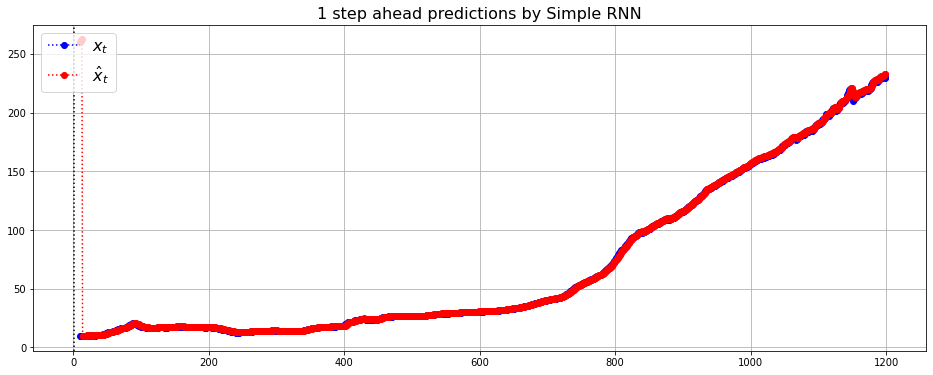

In [ ]:
window = np.arange(10,1200)

plt.figure(figsize=(16,6))
plt.title("1 step ahead predictions by Simple RNN",fontsize=16)

plt.axvline(x=1,linestyle=':',color='k')
plt.plot(xt.index[window],xt[window], linestyle=':', marker='o',color='blue',label = "$x_t$")
plt.plot(xt.index[window],xhat[window-n_timesteps], linestyle=':', marker='o',color='red',label = "$\hat{x}_t$")

plt.grid(True)
plt.legend(loc = 'upper left',fontsize=16)
plt.show()

In [ ]:
data = []

df = pd.DataFrame(data)

In [ ]:
df = pd.DataFrame(xhat[window-n_timesteps], columns = ["predicted"])
df["real"] = xt[window]
df = df.iloc[20:]

In [ ]:
df

,predicted,real
20,10.164299,10.200
21,10.209466,10.100
22,10.230348,10.200
23,10.233242,10.100
24,10.257479,10.100
...,...,...
1185,231.369919,226.421
1186,231.446075,226.230
1187,231.855331,225.672
1188,232.428711,226.665


In [ ]:
df

,predicted,real
20,10.164299,10.200
21,10.209466,10.100
22,10.230348,10.200
23,10.233242,10.100
24,10.257479,10.100
...,...,...
1185,231.369919,226.421
1186,231.446075,226.230
1187,231.855331,225.672
1188,232.428711,226.665


In [ ]:
CPI_yearly = pd.read_csv("CPI_yearly.csv")
gdp_yearly = pd.read_csv("gdp_yearly.csv")
Pop_yearly = pd.read_csv("Pop_yearly.csv")


In [ ]:
Pop_yearly["Population"] = Pop_yearly["Population"].astype(int)

In [ ]:

gdp_yearly["RealGDP"] = gdp_yearly["RealGDP"].str.replace(',', '')
gdp_yearly["RealGDP"] = gdp_yearly["RealGDP"].str.replace('$', '')

/tmp/ipykernel_25423/209906595.py:2: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will*not* be treated as literal strings when regex=True.
  gdp_yearly["RealGDP"] = gdp_yearly["RealGDP"].str.replace('$', '')


In [ ]:
gdp_yearly["NominalGDP"] = gdp_yearly["NominalGDP"].str.replace(',', '')
gdp_yearly["NominalGDP"] = gdp_yearly["NominalGDP"].str.replace('$', '')

/tmp/ipykernel_25423/1819036104.py:2: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will*not* be treated as literal strings when regex=True.
  gdp_yearly["NominalGDP"] = gdp_yearly["NominalGDP"].str.replace('$', '')


In [ ]:
gdp_yearly["NominalGDP"] = gdp_yearly["NominalGDP"].astype(float)


In [ ]:
gdp_yearly["RealGDP"] = gdp_yearly["RealGDP"].astype(float)

In [ ]:
CPI_df = pd.DataFrame(data)
CPI_df = pd.DataFrame(CPI_yearly, columns=["CPI"])
CPI_df["NominalGDP"] = gdp_yearly["NominalGDP"]
CPI_df["RealGDP"] = gdp_yearly["RealGDP"]
CPI_df["Population"] = pd.DataFrame(Pop_yearly, columns = ["Population"])


In [ ]:
CPI_df

,CPI,NominalGDP,RealGDP,Population
0,17.2,0.105,1.109,121767000
1,16.7,0.092,1.015,123076741
2,15.2,0.077,0.950,124039648
3,13.6,0.060,0.828,124840471
4,12.9,0.057,0.817,125578763
...,...,...,...,...
87,240.0,18.745,17.731,327210198
88,245.1,19.543,18.144,329791231
89,251.1,20.612,18.688,332140037
90,255.7,21433.000,18384.000,334319671


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(CPI_df[['RealGDP', 'Population']],
                                                    CPI_df["CPI"],
                                                    test_size=0.2)

In [ ]:
model1 = models.Sequential()
model1.add(Dense(32, input_shape=(2,), activation='relu'))
model1.add(Dense(32,activation='relu'))
model1.add(Dense(64,activation='relu'))
model1.add(Dense(32,activation='relu'))
model1.add(Dense(1,activation='relu'))
model1.summary()



Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_3 (Dense)             (None, 32)                96        
                                                                 
 dense_4 (Dense)             (None, 32)                1056      
                                                                 
 dense_5 (Dense)             (None, 64)                2112      
                                                                 
 dense_6 (Dense)             (None, 32)                2080      
                                                                 
 dense_7 (Dense)             (None, 1)                 33        
                                                                 
Total params: 5,377
Trainable params: 5,377
Non-trainable params: 0
_________________________________________________________________


In [ ]:
model1.compile(loss='mse', optimizer='sgd')

In [ ]:
y_train = y_train/10**4
y_test = y_test/10**4

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test  = scaler.transform(X_test)

In [ ]:
nepochs = 400
history = model1.fit(X_train, y_train,
          batch_size=128, epochs=nepochs,
          verbose=1,
          validation_data=(X_test, y_test))

Epoch 1/400
1/1 [==============================] - 0s 407ms/step - loss: 0.0077 - val_loss: 1.9657e-04
Epoch 2/400
1/1 [==============================] - 0s 20ms/step - loss: 0.0071 - val_loss: 1.8711e-04
Epoch 3/400
1/1 [==============================] - 0s 20ms/step - loss: 0.0065 - val_loss: 1.7927e-04
Epoch 4/400
1/1 [==============================] - 0s 19ms/step - loss: 0.0060 - val_loss: 1.7296e-04
Epoch 5/400
1/1 [==============================] - 0s 20ms/step - loss: 0.0056 - val_loss: 1.6775e-04
Epoch 6/400
1/1 [==============================] - 0s 20ms/step - loss: 0.0052 - val_loss: 1.6346e-04
Epoch 7/400
1/1 [==============================] - 0s 19ms/step - loss: 0.0049 - val_loss: 1.6005e-04
Epoch 8/400
1/1 [==============================] - 0s 20ms/step - loss: 0.0046 - val_loss: 1.5730e-04
Epoch 9/400
1/1 [==============================] - 0s 18ms/step - loss: 0.0044 - val_loss: 1.5518e-04
Epoch 10/400
1/1 [==============================] - 0s 19ms/step - loss: 0.0041 -

0.00015191052807494998
/tmp/ipykernel_25423/3151056627.py:6: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "b" (-> color=(0.0, 0.0, 1.0, 1)). The keyword argument will take precedence.
  plt.plot(range(1,nepochs+1), loss, 'b', label='loss',color="blue")
/tmp/ipykernel_25423/3151056627.py:7: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "b" (-> color=(0.0, 0.0, 1.0, 1)). The keyword argument will take precedence.
  plt.plot(range(1,nepochs+1), val_loss, 'b', label='validation loss',color="red")


<Figure size 432x288 with 0 Axes>

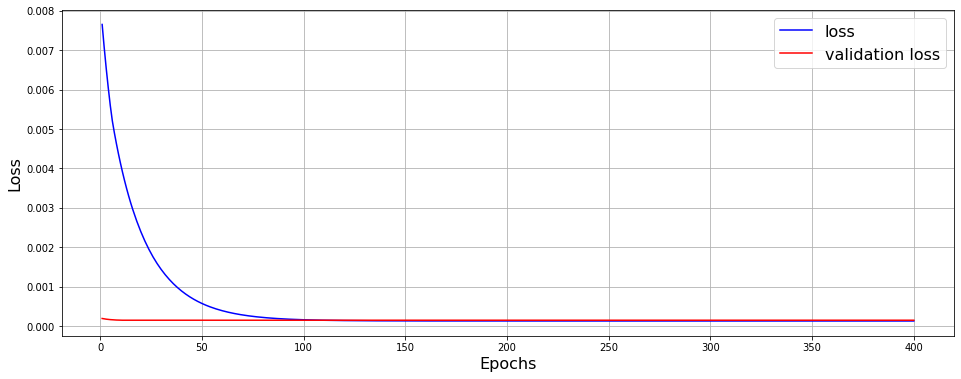

In [ ]:
plt.clf()
loss = history.history['loss']
val_loss = history.history['val_loss']
print(min(val_loss))
plt.figure(figsize=(16,6))
plt.plot(range(1,nepochs+1), loss, 'b', label='loss',color="blue")
plt.plot(range(1,nepochs+1), val_loss, 'b', label='validation loss',color="red")

plt.xlabel('Epochs',fontsize=16)
plt.ylabel('Loss',fontsize=16)
plt.grid(True)
plt.legend(loc = 'upper right',fontsize=16)

plt.show()

In [ ]:
Gold_monthly = pd.read_csv("gold_monthly.csv")
Gold_monthly['Date']=pd.to_datetime(Gold_monthly['Date'])
Gold_monthly = Gold_monthly.set_index('Date').resample('M').last().fillna(method='ffill').reset_index()
CPI_monthly = pd.read_csv("CPI_monthly.csv")
CPI_monthly["Goldprice"] = pd.DataFrame(Gold_monthly, columns = ["Goldprice"])


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(CPI_monthly["Goldprice"],
                                                    CPI_monthly["CPI"],
                                                    test_size=0.2)

In [ ]:
y_train = y_train/10**4
y_test = y_test/10**4

X_train = X_train.values.reshape(-1,1)
X_test = X_test.values.reshape(-1,1)
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test  = scaler.transform(X_test)

In [ ]:
model2 = models.Sequential()
model2.add(Dense(32, input_shape=(1,), activation='relu'))
model2.add(Dense(32,activation='relu'))
model2.add(Dense(64,activation='relu'))
model2.add(Dense(32,activation='relu'))
model2.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_8 (Dense)             (None, 32)                64        
                                                                 
 dense_9 (Dense)             (None, 32)                1056      
                                                                 
 dense_10 (Dense)            (None, 64)                2112      
                                                                 
 dense_11 (Dense)            (None, 32)                2080      
                                                                 
Total params: 5,312
Trainable params: 5,312
Non-trainable params: 0
_________________________________________________________________


In [ ]:
model2.compile(loss='mse', optimizer='Adam')

In [ ]:
nepochs = 400
history2 = model2.fit(X_train, y_train,
          batch_size=128, epochs=nepochs,
          verbose=1,
          validation_data=(X_test, y_test))

Epoch 1/400
9/9 [==============================] - 0s 14ms/step - loss: 0.0020 - val_loss: 5.8033e-04
Epoch 2/400
9/9 [==============================] - 0s 4ms/step - loss: 3.5248e-04 - val_loss: 1.6107e-04
Epoch 3/400
9/9 [==============================] - 0s 5ms/step - loss: 1.2094e-04 - val_loss: 9.6677e-05
Epoch 4/400
9/9 [==============================] - 0s 4ms/step - loss: 9.0859e-05 - val_loss: 9.1479e-05
Epoch 5/400
9/9 [==============================] - 0s 4ms/step - loss: 8.4710e-05 - val_loss: 8.9087e-05
Epoch 6/400
9/9 [==============================] - 0s 4ms/step - loss: 8.2764e-05 - val_loss: 8.7870e-05
Epoch 7/400
9/9 [==============================] - 0s 4ms/step - loss: 8.1412e-05 - val_loss: 8.5075e-05
Epoch 8/400
9/9 [==============================] - 0s 4ms/step - loss: 7.7759e-05 - val_loss: 7.9928e-05
Epoch 9/400
9/9 [==============================] - 0s 4ms/step - loss: 7.5033e-05 - val_loss: 7.6818e-05
Epoch 10/400
9/9 [==============================] - 0s 4ms

3.2560117688262835e-05
/tmp/ipykernel_25423/388196841.py:6: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "b" (-> color=(0.0, 0.0, 1.0, 1)). The keyword argument will take precedence.
  plt.plot(range(1,nepochs+1), loss, 'b', label='loss',color="blue")
/tmp/ipykernel_25423/388196841.py:7: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "b" (-> color=(0.0, 0.0, 1.0, 1)). The keyword argument will take precedence.
  plt.plot(range(1,nepochs+1), val_loss, 'b', label='validation loss',color="red")


<Figure size 432x288 with 0 Axes>

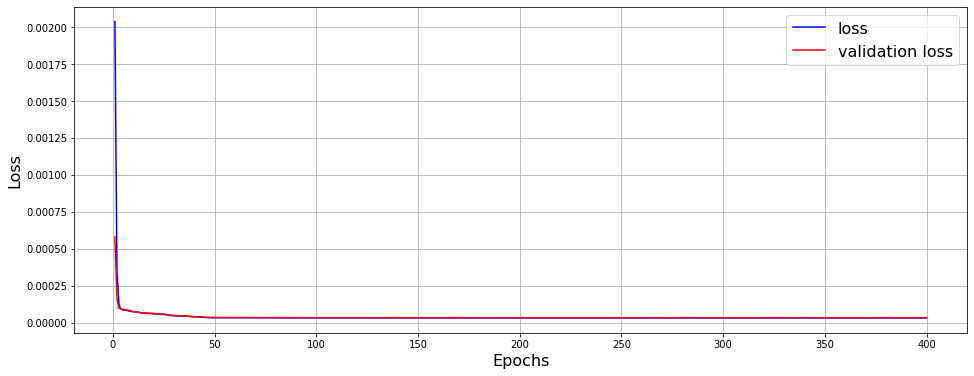

In [ ]:
plt.clf()
loss = history2.history['loss']
val_loss = history2.history['val_loss']
print(min(val_loss))
plt.figure(figsize=(16,6))
plt.plot(range(1,nepochs+1), loss, 'b', label='loss',color="blue")
plt.plot(range(1,nepochs+1), val_loss, 'b', label='validation loss',color="red")

plt.xlabel('Epochs',fontsize=16)
plt.ylabel('Loss',fontsize=16)
plt.grid(True)
plt.legend(loc = 'upper right',fontsize=16)

plt.show()

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(CPI_monthly[["CPI","Goldprice"]],
                                                    CPI_monthly["CPI"],
                                                    test_size=0.2)

In [ ]:
model3 = models.Sequential()
model3.add(Dense(32, input_shape=(2,), activation='relu'))
model3.add(Dense(32,activation='relu'))
model3.add(Dense(64,activation='relu'))
model3.add(Dense(32,activation='relu'))
model3.summary()


Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_12 (Dense)            (None, 32)                96        
                                                                 
 dense_13 (Dense)            (None, 32)                1056      
                                                                 
 dense_14 (Dense)            (None, 64)                2112      
                                                                 
 dense_15 (Dense)            (None, 32)                2080      
                                                                 
Total params: 5,344
Trainable params: 5,344
Non-trainable params: 0
_________________________________________________________________


In [ ]:
y_train = y_train/10**4
y_test = y_test/10**4

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test  = scaler.transform(X_test)

In [ ]:
model3.compile(loss='mse', optimizer='Adam')

In [ ]:
nepochs = 400
history3 = model3.fit(X_train, y_train,
          batch_size=128, epochs=nepochs,
          verbose=1,
          validation_data=(X_test, y_test))

Epoch 1/400
9/9 [==============================] - 0s 16ms/step - loss: 0.0034 - val_loss: 8.6696e-04
Epoch 2/400
9/9 [==============================] - 0s 4ms/step - loss: 4.2654e-04 - val_loss: 1.5832e-04
Epoch 3/400
9/9 [==============================] - 0s 5ms/step - loss: 1.1998e-04 - val_loss: 1.1294e-04
Epoch 4/400
9/9 [==============================] - 0s 4ms/step - loss: 9.7111e-05 - val_loss: 1.0489e-04
Epoch 5/400
9/9 [==============================] - 0s 4ms/step - loss: 8.8978e-05 - val_loss: 9.5767e-05
Epoch 6/400
9/9 [==============================] - 0s 4ms/step - loss: 8.3553e-05 - val_loss: 9.1378e-05
Epoch 7/400
9/9 [==============================] - 0s 6ms/step - loss: 7.8737e-05 - val_loss: 8.2934e-05
Epoch 8/400
9/9 [==============================] - 0s 4ms/step - loss: 7.4149e-05 - val_loss: 7.9999e-05
Epoch 9/400
9/9 [==============================] - 0s 4ms/step - loss: 7.1709e-05 - val_loss: 7.8287e-05
Epoch 10/400
9/9 [==============================] - 0s 4ms

9.2999471235089e-06
/tmp/ipykernel_25423/814288453.py:6: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "b" (-> color=(0.0, 0.0, 1.0, 1)). The keyword argument will take precedence.
  plt.plot(range(1,nepochs+1), loss, 'b', label='loss',color="blue")
/tmp/ipykernel_25423/814288453.py:7: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "b" (-> color=(0.0, 0.0, 1.0, 1)). The keyword argument will take precedence.
  plt.plot(range(1,nepochs+1), val_loss, 'b', label='validation loss',color="red")


<Figure size 432x288 with 0 Axes>

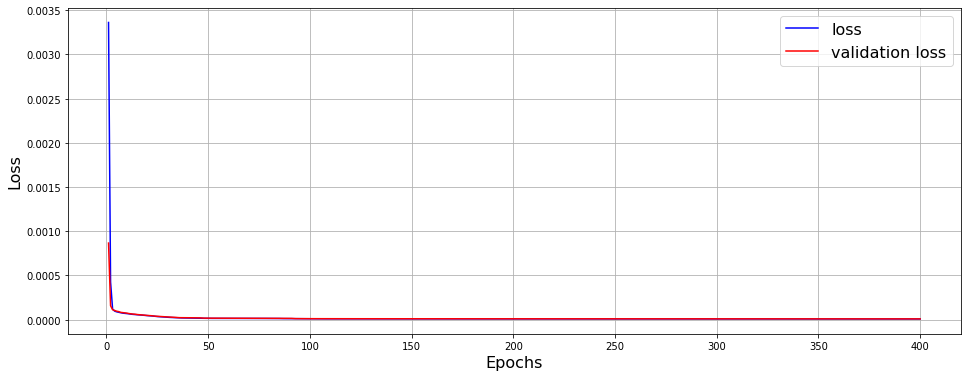

In [ ]:
plt.clf()
loss = history3.history['loss']
val_loss = history3.history['val_loss']
print(min(val_loss))
plt.figure(figsize=(16,6))
plt.plot(range(1,nepochs+1), loss, 'b', label='loss',color="blue")
plt.plot(range(1,nepochs+1), val_loss, 'b', label='validation loss',color="red")

plt.xlabel('Epochs',fontsize=16)
plt.ylabel('Loss',fontsize=16)
plt.grid(True)
plt.legend(loc = 'upper right',fontsize=16)

plt.show()

<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=da06c7de-90de-4eea-9ffe-050b3a97225e' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>